## Linear Regression Assignment - Bike Sharing 

### Objective of the case study:

1. To know which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands


In [41]:
# Import the necessary python libraries for the analysis
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd


## Step 1 :  Reading and understanding the dataset:

In [42]:
#importing the dataset "day.csv"
bikes_data = pd.read_csv("day.csv")

In [43]:
#reading the content of the dataframe
bikes_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [44]:
#Getting the size of the dataframe
print(bikes_data.shape)

#Getting the info to verify if there are any null values present in the dataframe
bikes_data.info()


(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [45]:
#Getting the description of the dataframe
bikes_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data conversion:

1. The "season" and "weathersit" columns have been encoded with a dummy numeric data to represent each category. 
2. Lets us first convert the above two columns into categorical variable 
3. From the data dictionary, we know that seasons are represented as below 1:spring, 2:summer, 3:fall, 4:winter 
4. weathersit as 1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain .

In [46]:
bikes_data.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [47]:
#converting season column to categorical

def season_change(x):
    if x == 1:
        return "spring"
    elif x == 2:
        return "summer"
    elif x == 3:
        return "fall"
    else:
        return "winter"

bikes_data['season'] = bikes_data['season'].apply(lambda x : season_change(x))


#converting weathersit column to categorical

def weathersit_change(x):
    if x == 1:
        return "clear"
    elif x == 2:
        return "mist"
    elif x == 3:
        return "light_rain"
    else:
        return "heavy_rain"
    
bikes_data.weathersit = bikes_data.weathersit.apply(lambda x : weathersit_change(x))


In [48]:
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualizing the data and getting valuable insights

1. In order to find any strong association between target variable and any predictor varible, we need to visualize the dataset against different combination of variables.
2. To visualize the dataset, let's use matplotlib and seaborn python libraries.

In [49]:
#importing the necessary python visulazation librabries
import matplotlib.pyplot as plt
import seaborn as sns

### In order to check whether there is increase in demand for bike sharing from 2018 to 2019

#### Plotting a bar graph for both the years 2018 and 2019

Text(0, 0.5, 'count')

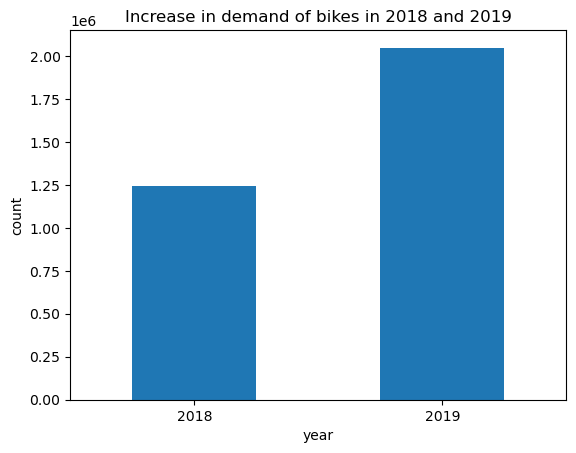

In [50]:
bikes_data.groupby(bikes_data.yr)['cnt'].sum().plot.bar()
plt.title("Increase in demand of bikes in 2018 and 2019")
plt.xticks([0,1], ["2018", "2019"],rotation=360)
plt.xlabel("year") 
plt.ylabel("count")

### Observation:
1. It is obvious from the above bar graph that there is increase in demand for bikes from 2018 to 2019

In [51]:
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Lets check if there are any outliers present in the numeric variables such as temp, atemp, hum, windspeed, casual, registered and cnt

<Axes: title={'center': 'Checking Outliers in count'}>

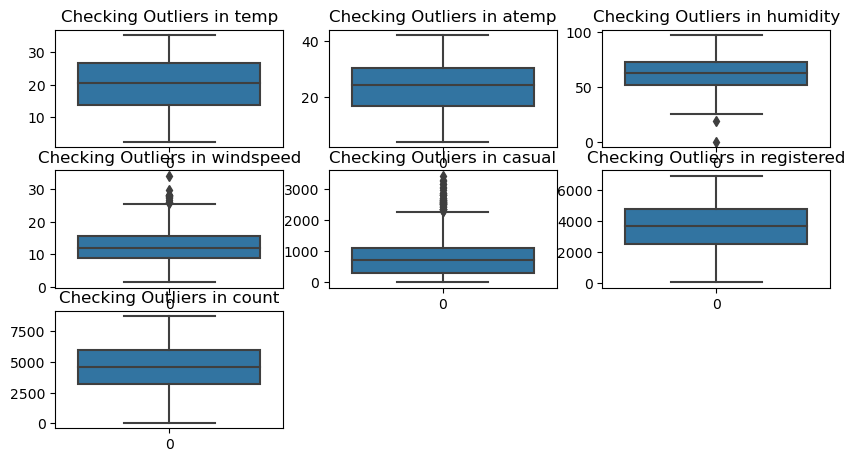

In [52]:
plt.figure(figsize=(10,7))
plt.subplot(4,3,1)
plt.title("Checking Outliers in temp")
sns.boxplot(bikes_data.temp)
plt.subplot(4,3,2)
plt.title("Checking Outliers in atemp")
sns.boxplot(bikes_data.atemp)
plt.subplot(4,3,3)
plt.title("Checking Outliers in humidity")
sns.boxplot(bikes_data.hum)
plt.subplot(4,3,4)
plt.title("Checking Outliers in windspeed")
sns.boxplot(bikes_data.windspeed)
plt.subplot(4,3,5)
plt.title("Checking Outliers in casual")
sns.boxplot(bikes_data.casual)
plt.subplot(4,3,6)
plt.title("Checking Outliers in registered")
sns.boxplot(bikes_data.registered)
plt.subplot(4,3,7)
plt.title("Checking Outliers in count")
sns.boxplot(bikes_data.cnt)

#### Observation:
1. Since, few outliers are observed in humidity, windspeed and casual, it wont affect our analysis in greater impact. So let's continue our analysis

In [53]:
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### To find which month have greater number of bike shared

Text(0, 0.5, 'count')

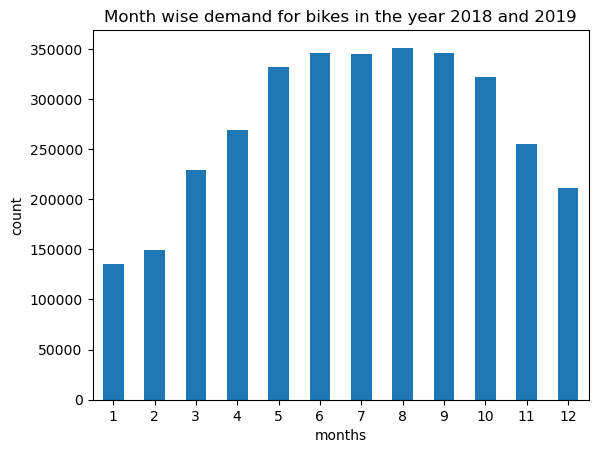

In [54]:
bikes_data.groupby(bikes_data.mnth)['cnt'].sum().plot.bar()
plt.title("Month wise demand for bikes in the year 2018 and 2019")
plt.xlabel("months")
plt.xticks(rotation=360)
plt.ylabel("count")

#### Observation:
1. It is observed that from may to october, there is constant increase in demand for bikes for the year 2018 and 2019

#### To find season wise demand for bikes in 2018 and 2019

Text(0, 0.5, 'count')

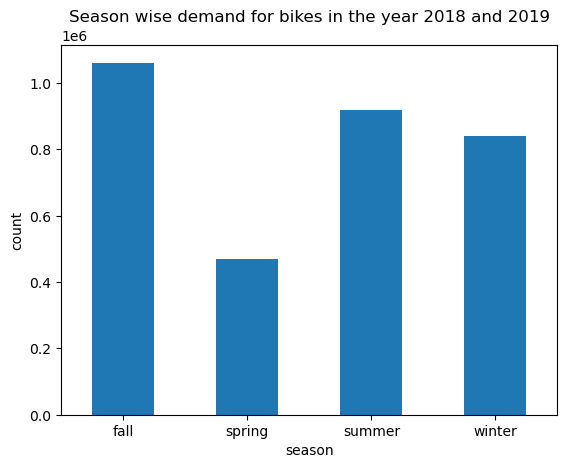

In [55]:
bikes_data.groupby(bikes_data.season)['cnt'].sum().plot.bar()
plt.title("Season wise demand for bikes in the year 2018 and 2019")
plt.xlabel("season")
plt.xticks(rotation=360)
plt.ylabel("count")

#### Observation:
1. Among the four seasons, in fall there are more demand for bikes followed by summer and winter

#### To find weather wise demand for bikes in 2018 and 2019

In [56]:
bikes_data.weathersit.value_counts()

weathersit
clear         463
mist          246
light_rain     21
Name: count, dtype: int64

Text(0, 0.5, 'count')

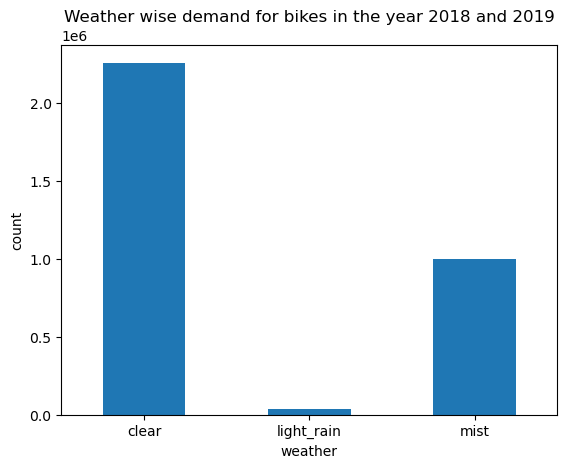

In [57]:
bikes_data.groupby(bikes_data.weathersit)['cnt'].sum().plot.bar()
plt.title("Weather wise demand for bikes in the year 2018 and 2019")
plt.xlabel("weather")
plt.xticks(rotation=360)
plt.ylabel("count")

#### Observation:
1. It is observed that, when the sky is clear, most people are accounting for shared bikes.

In [58]:
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### To find find day of the week, more people opt for shared bikes

Text(0, 0.5, 'count')

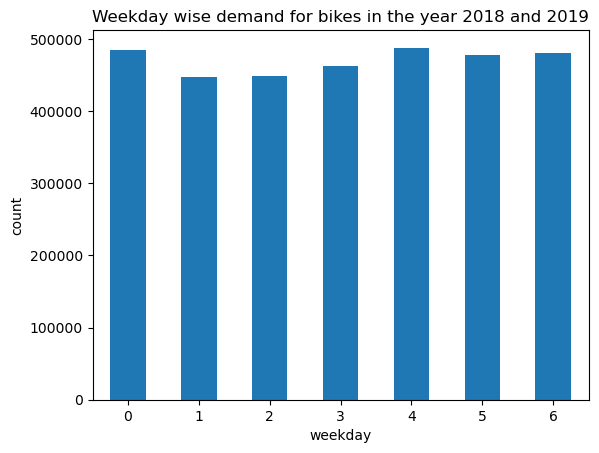

In [59]:
bikes_data.groupby(bikes_data.weekday)['cnt'].sum().plot.bar()
plt.title("Weekday wise demand for bikes in the year 2018 and 2019")
plt.xlabel("weekday")
plt.xticks(rotation=360)
plt.ylabel("count")

#### Observation:
1. It is quite surprising to observe that, for all days, there is approximately equal amount of demand for shared bikes

#### To find the demand of bikes in holidays and working days

Text(0, 0.5, 'count')

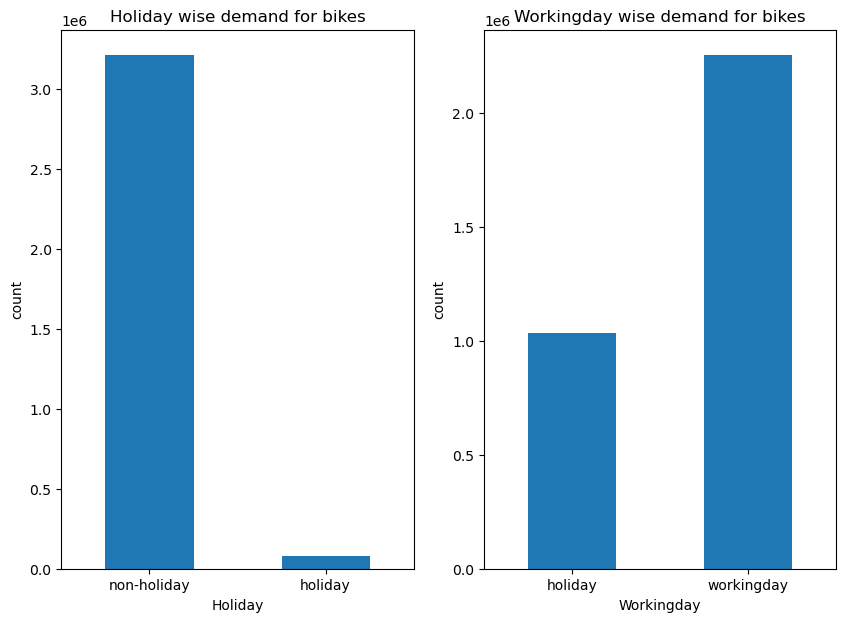

In [60]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
bikes_data.groupby(bikes_data.holiday)['cnt'].sum().plot.bar()
plt.title("Holiday wise demand for bikes")
plt.xlabel("Holiday")
plt.xticks([0,1],["non-holiday", "holiday"])
plt.xticks(rotation=360)
plt.ylabel("count")
plt.subplot(1,2,2)
bikes_data.groupby(bikes_data.workingday)['cnt'].sum().plot.bar()
plt.title("Workingday wise demand for bikes")
plt.xlabel("Workingday")
plt.xticks([0,1],["holiday", "workingday"])
plt.xticks(rotation=360)
plt.ylabel("count")

#### Observation:
1. From the above bar graph, it is known that, people are in great demand for bikes on workingdays rather than on holidays

In [61]:
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Lets find if there is any correlation between the target variable and other numeric variables

#### Scatter plot of temperature, actual temperature, humidity, windspeed vs count, 

Text(0, 0.5, 'count')

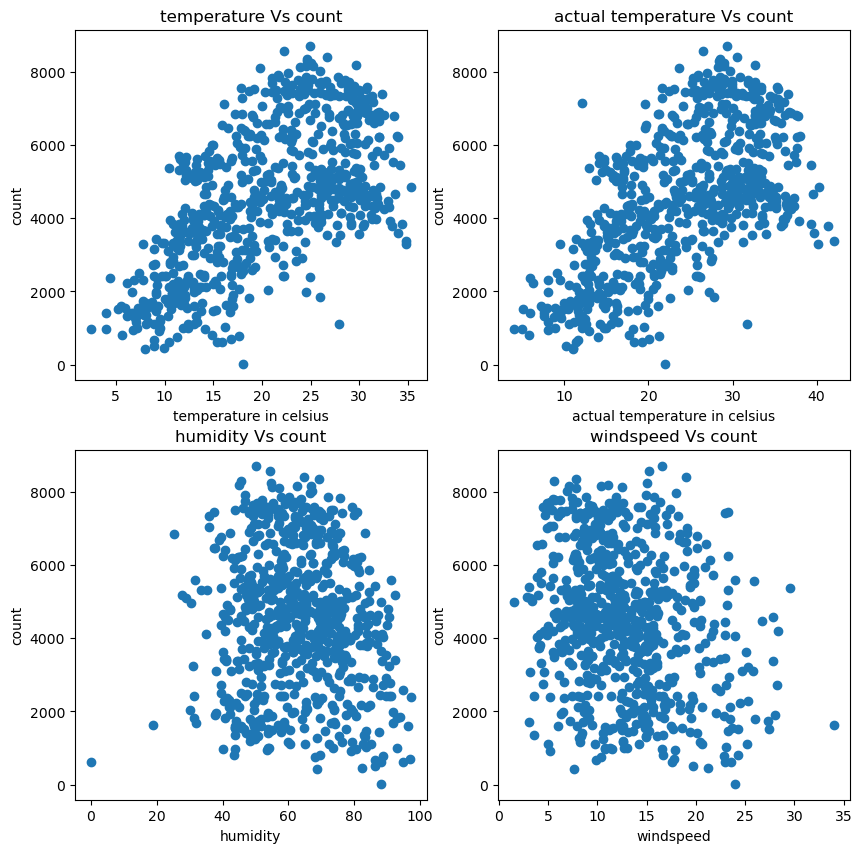

In [62]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(bikes_data.temp, bikes_data.cnt)
plt.title("temperature Vs count")
plt.xlabel("temperature in celsius")
plt.ylabel("count")
plt.subplot(2,2,2)
plt.scatter(bikes_data.atemp, bikes_data.cnt)
plt.title("actual temperature Vs count")
plt.xlabel("actual temperature in celsius")
plt.ylabel("count")
plt.subplot(2,2,3)
plt.scatter(bikes_data.hum, bikes_data.cnt)
plt.title("humidity Vs count")
plt.xlabel("humidity")
plt.ylabel("count")
plt.subplot(2,2,4)
plt.scatter(bikes_data.windspeed, bikes_data.cnt)
plt.title("windspeed Vs count")
plt.xlabel("windspeed")
plt.ylabel("count")

#### Observation:
1. From the above scatter plot, it is obvious that, there is high linearity between temperature and the demand for bikes.
2. If the temperature is high, more people are opting for bike rather than any other form of vechicle. 
3. It is observed that, people prefer to use bikes in summer rather than cold times

#### Lets find if there are more registered users rather than casual users

In [63]:
print("Casual Users :",bikes_data.casual.sum())
print("Registered Users: ",bikes_data.registered.sum())

Casual Users : 619952
Registered Users:  2670893


#### Observation:
1. It is known that, there are more registered users than casual users rented for bike

In [64]:
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 3: Data Preparation

### Creating Dummy Variables

1. In regression analysis, a dummy variable (also known as indicator variable or just dummy) is one that takes a 
binary value (0 or 1) to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.
2. If there N levels in the variable, then there should be N-1 dummy variable created.
3. Variable "season" has 4 levels namely fall, spring, summer, winter. Therefore creating (N-1) (4-1) 3 dummy variables

### Preparing the dataset for clear visibility and model building

In [65]:
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Remarks:

1. The variables "instant" and "dteday" are not necessary for our analysis.
2. We need to create dummy variables for "season" as there are 4 levels, we require (N-1) 3 dummy variables
3. Since the "yr" has 2 levels, lets create a dummy a variable (N-1) say "year_2019" ( 0 - Not 2019, 1 - 2019)

In [66]:
#dropping instant and dteday
bikes_data = bikes_data.drop(['instant', 'dteday'], axis=1)

In [67]:
bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [68]:
#creating dummy variable for season
bike_seasons = pd.get_dummies(bikes_data['season'], dtype=int, drop_first=True)
bikes_data = pd.concat([bikes_data, bike_seasons], axis=1)
bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [69]:
#dropping the season column as it is no longer required
bikes_data.drop(['season'], axis=1, inplace=True)

In [70]:
bikes_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [71]:
#creating dummy variable for yr
bike_yr = pd.get_dummies(bikes_data['yr'], dtype=int, drop_first=True)
bike_yr.rename(columns={1:'yr_2019'},inplace=True)
bikes_data = pd.concat([bikes_data,bike_yr], axis=1)
bikes_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,yr_2019
0,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0
1,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0
2,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0
3,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0
4,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0


In [72]:
#dropping yr column
bikes_data.drop(['yr'], axis=1, inplace=True)

In [73]:
bikes_data.head()

,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,yr_2019
0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0
1,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0
2,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0
3,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0
4,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0


#### examining month column

In [74]:
bikes_data.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [75]:
#Replacing month number with month name for easy visual
bikes_data['mnth'] = bikes_data['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',
                                                  9:'sept',10:'oct',11:'nov',12:'dec'})


In [76]:
#creating dummy variables for "month"
bike_month = pd.get_dummies(bikes_data['mnth'], dtype=int, drop_first=True)
bikes_data = pd.concat([bikes_data, bike_month], axis=1)
bikes_data.head()

,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,jan,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,0
1,jan,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,jan,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,jan,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,...,0,0,1,0,0,0,0,0,0,0
4,jan,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,...,0,0,1,0,0,0,0,0,0,0


In [77]:
#dropping month column
bikes_data.drop(['mnth'], axis=1, inplace=True)

In [78]:
bikes_data.head()

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,1,0,0,0,0,0,0,0
2,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,0,0,0
4,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,1,0,0,0,0,0,0,0


In [79]:
#Renaming holiday to is_holiday for easy readability
bikes_data.rename(columns={'holiday':'is_holiday'}, inplace=True)

In [80]:
bikes_data.head()

,is_holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,1,0,0,0,0,0,0,0
2,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,0,0,0
4,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,1,0,0,0,0,0,0,0


#### examining weekday column

In [81]:
bikes_data.weekday.value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [82]:
#Replacing weekday number with weekday name for easy readability
bikes_data['weekday'] = bikes_data.weekday.map({0:'mon', 1:'tue', 2:'wed', 3:'thur', 4:'fri', 5:'sat', 6:'sun'})

In [83]:
#creating dummy variables for weekday
bike_weekday = pd.get_dummies(bikes_data['weekday'], dtype=int, drop_first=True)
bikes_data = pd.concat([bikes_data, bike_weekday], axis=1)
bikes_data.head()

,is_holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,may,nov,oct,sept,mon,sat,sun,thur,tue,wed
0,0,tue,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,0,0,0,1,0
1,0,wed,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,0,0,1
2,0,thur,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
3,0,fri,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,0,0,0
4,0,sat,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,1,0,0,0,0


In [84]:
#dropping weekday column
bikes_data.drop(['weekday'], axis=1, inplace=True)

In [85]:
bikes_data.head()

,is_holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,...,may,nov,oct,sept,mon,sat,sun,thur,tue,wed
0,0,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,0,0,1,0
1,0,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,0,1
2,0,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,1,0,0,0,0


In [86]:
#Renaming workingday to is_workingday [1- workingday/ 0 - not working day]
bikes_data.rename(columns=({'workingday': 'is_workingday'}), inplace=True)
bikes_data.head()

,is_holiday,is_workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,...,may,nov,oct,sept,mon,sat,sun,thur,tue,wed
0,0,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,0,0,1,0
1,0,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,0,1
2,0,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,1,0,0,0,0


In [87]:
#creating dummy variables for weathersit column
bike_weather = pd.get_dummies(bikes_data['weathersit'], dtype=int, drop_first=True)
bikes_data = pd.concat([bikes_data,bike_weather], axis=1)
bikes_data.head()

,is_holiday,is_workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,...,oct,sept,mon,sat,sun,thur,tue,wed,light_rain,mist
0,0,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,1,0,0,1
1,0,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,1,0,1
2,0,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,1,0,0,0,0
3,0,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,1,0,0,0,0,0,0


In [88]:
#dropping weathersit column
bikes_data.drop(['weathersit'], axis=1, inplace=True)

In [89]:
bikes_data.head()

,is_holiday,is_workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,...,oct,sept,mon,sat,sun,thur,tue,wed,light_rain,mist
0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,...,0,0,0,0,0,0,1,0,0,1
1,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,0,1,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,...,0,0,0,1,0,0,0,0,0,0


In [90]:
bikes_data.shape

(730, 32)

we know that, cnt = casual + registered, therefore we can remove those two columns from the dataset as they are unnecessary

In [91]:
#dropping casual and registered column
bikes_data.drop(['casual', 'registered'], axis=1, inplace=True)

In [92]:
bikes_data.shape

(730, 30)

In [93]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   is_holiday     730 non-null    int64  
 1   is_workingday  730 non-null    int64  
 2   temp           730 non-null    float64
 3   atemp          730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   spring         730 non-null    int32  
 8   summer         730 non-null    int32  
 9   winter         730 non-null    int32  
 10  yr_2019        730 non-null    int32  
 11  aug            730 non-null    int32  
 12  dec            730 non-null    int32  
 13  feb            730 non-null    int32  
 14  jan            730 non-null    int32  
 15  jul            730 non-null    int32  
 16  jun            730 non-null    int32  
 17  mar            730 non-null    int32  
 18  may       

## Step 4: Splitting the Data into Training and Testing Sets

In [94]:
#importing the necessary librabries
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bikes_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [95]:
bike_train.shape

(510, 30)

In [96]:
bike_test.shape

(219, 30)

### Scaling the variables

Though scaling does have any impact in our model building, we can just rescale the variables so that they have a comparable scale 

In [97]:
#importing the necessary libraries for scaling
from sklearn.preprocessing import MinMaxScaler

#creating object for MinMaxScaler class
scaler = MinMaxScaler()

#scaling all numeric variables
to_scale_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#scaling
bike_train[to_scale_vars] = scaler.fit_transform(bike_train[to_scale_vars])

In [98]:
#checking all the variables after scaling
bike_train.describe()

,is_holiday,is_workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thur,tue,wed,light_rain,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.029412,0.343137
std,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the correlation between the variables in the dataset using heatmap

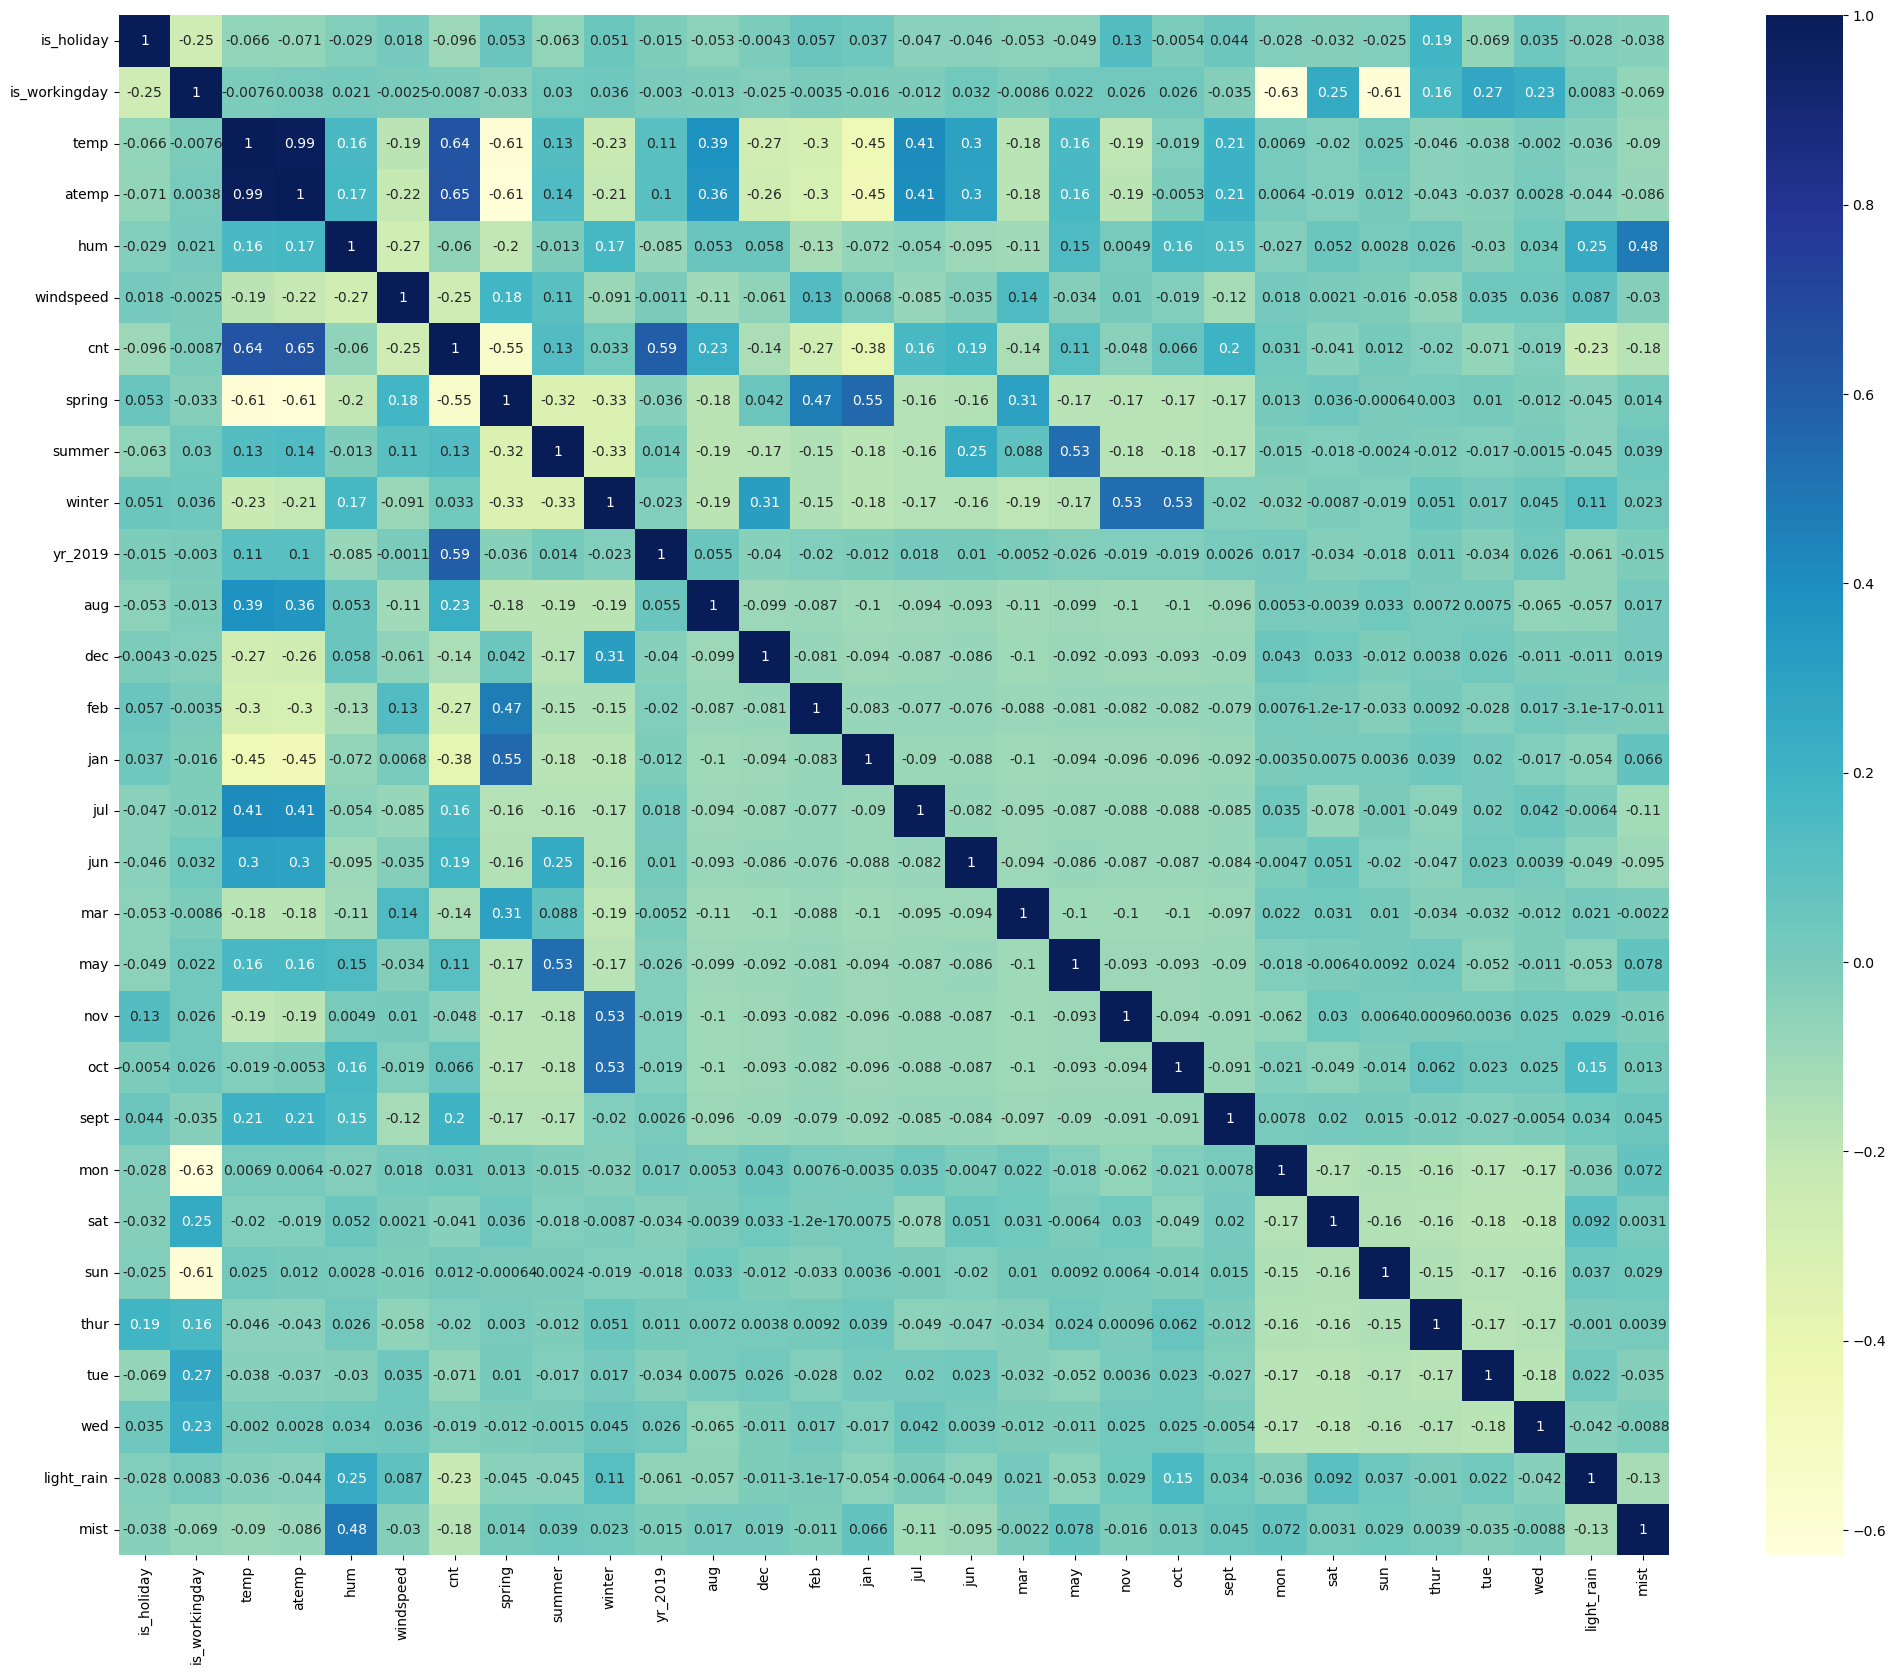

In [99]:
plt.figure(figsize=(25,20))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 5: Building the model

### Dividing the dataset into X and Y set

In [100]:
y_train = bike_train.pop("cnt")
X_train = bike_train

In [101]:
print(X_train.shape)
print(y_train.shape)


(510, 29)
(510,)


### Remarks:

1. Let us follow the backward approach ie by building the model on all variables and removing it one by one based on the 
p-value and the VIF.
2. Since there are nearly 30 variables, it would be difficult or the model would become complex. So it is preferred to use certain automated techniques such as Recursive Feature Elimination (RFE).

In [102]:
# Importing RFE and LinearRegression from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [103]:
#creating an object for LinearRegression Class
lm = LinearRegression()

#fitting the model
lm = lm.fit(X_train, y_train)

#selecting desired variables using RFE limiting to 18 variables (18 out of 30)
rfe = RFE(lm, n_features_to_select=18)
rfe = rfe.fit(X_train, y_train)

In [104]:
#rfe.support - helps us to get the best 18 variables and ranking is given
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('is_holiday', True, 1),
 ('is_workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr_2019', True, 1),
 ('aug', False, 7),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 12),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 9),
 ('sept', True, 1),
 ('mon', False, 2),
 ('sat', False, 10),
 ('sun', True, 1),
 ('thur', False, 8),
 ('tue', False, 6),
 ('wed', False, 5),
 ('light_rain', True, 1),
 ('mist', True, 1)]

In [105]:
#Lets get the best 18 variables suggested by RFE (ie rfe.support - True)
best_vars = X_train.columns[rfe.support_]
best_vars

Index(['is_holiday', 'is_workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'yr_2019', 'dec', 'feb', 'jan', 'jul', 'nov',
       'sept', 'sun', 'light_rain', 'mist'],
      dtype='object')

### Now, Lets build the model using the RFE suggested 18 variables

In [106]:
X_train_rfe = X_train[best_vars]
X_train_rfe.head()

,is_holiday,is_workingday,temp,hum,windspeed,spring,summer,winter,yr_2019,dec,feb,jan,jul,nov,sept,sun,light_rain,mist
653,0,1,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,0,0,0,0,0,0
576,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0,0,0,0,0
426,0,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,0,0,1
728,0,1,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,0,1


### Model 1:

In [107]:
#import the necessary library to build the model
import statsmodels.api as sm

#Adding the constant because `statsmodels` fits a regression line passing through the origin, by default.
X_train_lm1 = sm.add_constant(X_train_rfe)

#fitting the model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [108]:
#checking the params
lr1.params

const            0.347392
is_holiday      -0.106396
is_workingday   -0.022733
temp             0.461733
hum             -0.151778
windspeed       -0.189108
spring          -0.052409
summer           0.037844
winter           0.102144
yr_2019          0.230624
dec             -0.048168
feb             -0.035505
jan             -0.062904
jul             -0.055008
nov             -0.044586
sept             0.072719
sun             -0.006780
light_rain      -0.251677
mist            -0.058878
dtype: float64

In [109]:
#getting the summary
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.0
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          1.88e-187
Time:                        00:06:45   Log-Likelihood:                 518.60
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     491   BIC:                            -918.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3474      0.038      9.220      0.000       0.273       0.421
is_holiday       -0.1064      0.027     -3.909      0.000      -0.160      -0.053
is_workingday    -0.0227      0.012     -1.928      0.054      -0.046       0.000
temp              0.4617      0.038     12.123      0.000       0.387       0.537
hum              -0.1518      0.038     -4.020      0.000      -0.226      -0.078
windspeed        -0.1891      0.026     -7.365      0.000      -0.240      -0.139
spring           -0.0524      0.022     -2.386      0.017      -0.096      -0.009
summer            0.0378      0.015      2.458      0.014       0.008       0.068
winter            0.1021      0.018      5.706      0.000       0.067       0.137
yr_2019           0.2306      0.008     28.655      0.000       0.215       0.246
dec              -0.0482      0.018     -2.637      0.009      -0.084      -0.012
feb              -0.0355      0.022     -1.643      0.101      -0.078       0.007
jan              -0.0629      0.021     -2.936      0.003      -0.105      -0.021
jul              -0.0550      0.018     -3.031      0.003      -0.091      -0.019
nov              -0.0446      0.019     -2.360      0.019      -0.082      -0.007
sept              0.0727      0.017      4.322      0.000       0.040       0.106
sun              -0.0068      0.015     -0.443      0.658      -0.037       0.023
light_rain       -0.2517      0.026     -9.557      0.000      -0.303      -0.200
mist             -0.0589      0.010     -5.610      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       78.579   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.920
Skew:                          -0.802   Prob(JB):                     2.58e-41
Kurtosis:                       5.495   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking the VIF values for the variables

1. A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model.
2. A VIF of 1 will mean that the variables are not correlated; a VIF between 1 and 5 shows that variables are moderately correlated, and a VIF between 5 and 10 will mean that variables are highly correlated.

#### Criteria/Hierarchy on which the variables can be removed:

1. High P-value and High VIF (can be removed first)
2. High P-value and Low VIF (can be removed second)
3. Low P-value and High VIF (can be removed third)
4. Low P-value and Low VIF (significant)

### Calculating the VIFs for the model built

In [110]:
# importing the libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.79
2,temp,19.14
1,is_workingday,5.99
5,spring,5.59
4,windspeed,4.78
7,winter,4.14
6,summer,2.88
11,jan,2.39
17,mist,2.38
8,yr_2019,2.09


#### Model 1 remarks:

1. The R-squared and Adj R-squared values are pretty good (0.82)
2. we see that variable "sun" or "sunday" have high P-value accounting for 0.6, so lets first remove the "sun" variable and rebuild the model

### Model 2:


In [111]:
#dropping the column sun from X_train_rfe
X_train_rfe.drop(['sun'], axis=1, inplace=True)

In [112]:
#Adding the constant because `statsmodels` fits a regression line passing through the origin, by default.
X_train_lm2 = sm.add_constant(X_train_rfe)

#fitting the model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

#getting the summary
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          1.60e-188
Time:                        00:06:56   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3443      0.037      9.310      0.000       0.272       0.417
is_holiday       -0.1035      0.026     -3.919      0.000      -0.155      -0.052
is_workingday    -0.0194      0.009     -2.132      0.033      -0.037      -0.002
temp              0.4613      0.038     12.126      0.000       0.387       0.536
hum              -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed        -0.1888      0.026     -7.363      0.000      -0.239      -0.138
spring           -0.0526      0.022     -2.399      0.017      -0.096      -0.010
summer            0.0377      0.015      2.453      0.015       0.008       0.068
winter            0.1021      0.018      5.709      0.000       0.067       0.137
yr_2019           0.2307      0.008     28.704      0.000       0.215       0.247
dec              -0.0480      0.018     -2.632      0.009      -0.084      -0.012
feb              -0.0353      0.022     -1.635      0.103      -0.078       0.007
jan              -0.0629      0.021     -2.939      0.003      -0.105      -0.021
jul              -0.0548      0.018     -3.022      0.003      -0.090      -0.019
nov              -0.0450      0.019     -2.390      0.017      -0.082      -0.008
sept              0.0727      0.017      4.326      0.000       0.040       0.106
light_rain       -0.2521      0.026     -9.590      0.000      -0.304      -0.200
mist             -0.0588      0.010     -5.606      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       77.523   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.128
Skew:                          -0.792   Prob(JB):                     1.04e-40
Kurtosis:                       5.481   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
#checking the VIF for model 2:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.48
2,temp,18.49
5,spring,5.48
4,windspeed,4.76
7,winter,4.10
1,is_workingday,3.70
6,summer,2.84
11,jan,2.38
16,mist,2.37
8,yr_2019,2.09


#### Model 2 Remarks:

1. The R-squared and Adj R-squared values are remains to be good (0.82).
2. The P-values for most of the variables are pretty good, but few variables have very high VIF, So lets drop the humidity column which is having a greater VIF value of 32

### Model 3:

In [114]:
#dropping the column hum from X_train_rfe
X_train_rfe.drop(['hum'], axis=1, inplace=True)

In [115]:
#Adding the constant because `statsmodels` fits a regression line passing through the origin, by default.
X_train_lm3 = sm.add_constant(X_train_rfe)

#fitting the model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

#getting the summary
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.1
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          3.40e-186
Time:                        00:06:57   Log-Likelihood:                 510.24
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     493   BIC:                            -914.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2778      0.034      8.270      0.000       0.212       0.344
is_holiday       -0.1061      0.027     -3.959      0.000      -0.159      -0.053
is_workingday    -0.0223      0.009     -2.417      0.016      -0.040      -0.004
temp              0.4198      0.037     11.292      0.000       0.347       0.493
windspeed        -0.1607      0.025     -6.414      0.000      -0.210      -0.111
spring           -0.0613      0.022     -2.764      0.006      -0.105      -0.018
summer            0.0305      0.016      1.964      0.050   -1.09e-05       0.061
winter            0.0881      0.018      4.947      0.000       0.053       0.123
yr_2019           0.2345      0.008     28.928      0.000       0.219       0.250
dec              -0.0559      0.018     -3.034      0.003      -0.092      -0.020
feb              -0.0381      0.022     -1.738      0.083      -0.081       0.005
jan              -0.0706      0.022     -3.261      0.001      -0.113      -0.028
jul              -0.0499      0.018     -2.719      0.007      -0.086      -0.014
nov              -0.0462      0.019     -2.413      0.016      -0.084      -0.009
sept              0.0662      0.017      3.898      0.000       0.033       0.100
light_rain       -0.2948      0.024    -12.065      0.000      -0.343      -0.247
mist             -0.0832      0.009     -9.595      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       80.457   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.276
Skew:                          -0.813   Prob(JB):                     3.95e-43
Kurtosis:                       5.559   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
#checking the VIF for model 3:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.20
3,windspeed,4.69
4,spring,4.45
1,is_workingday,3.59
6,winter,3.11
5,summer,2.31
10,jan,2.23
7,yr_2019,2.08
9,feb,1.89
12,nov,1.83


#### Model 3 Remarks:

1. The R-squared and Adj R-squared values are remains to be good (0.84).
2. The P-values for most of the variables are pretty good as well, but the variable "temp" has high VIF value accounting for 6.20. Since we know that temp has very good linear correlation with the target variable cnt. So lets try not removing that variable and rebuild the model by removing the "feb" variable as it has P-value of 0.08 (> 0.05)

### Model 4:

In [117]:
#dropping the column feb from X_train_rfe
X_train_rfe.drop(['feb'], axis=1, inplace=True)

In [118]:
#Adding the constant because `statsmodels` fits a regression line passing through the origin, by default.
X_train_lm4 = sm.add_constant(X_train_rfe)

#fitting the model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

#getting the summary
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          1.13e-186
Time:                        00:06:59   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2646      0.033      8.069      0.000       0.200       0.329
is_holiday       -0.1090      0.027     -4.066      0.000      -0.162      -0.056
is_workingday    -0.0226      0.009     -2.447      0.015      -0.041      -0.004
temp              0.4362      0.036     12.103      0.000       0.365       0.507
windspeed        -0.1590      0.025     -6.339      0.000      -0.208      -0.110
spring           -0.0719      0.021     -3.365      0.001      -0.114      -0.030
summer            0.0339      0.015      2.198      0.028       0.004       0.064
winter            0.0898      0.018      5.041      0.000       0.055       0.125
yr_2019           0.2342      0.008     28.835      0.000       0.218       0.250
dec              -0.0462      0.018     -2.627      0.009      -0.081      -0.012
jan              -0.0503      0.018     -2.753      0.006      -0.086      -0.014
jul              -0.0509      0.018     -2.769      0.006      -0.087      -0.015
nov              -0.0411      0.019     -2.167      0.031      -0.078      -0.004
sept              0.0677      0.017      3.984      0.000       0.034       0.101
light_rain       -0.2939      0.024    -12.008      0.000      -0.342      -0.246
mist             -0.0833      0.009     -9.584      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       75.619   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.431
Skew:                          -0.772   Prob(JB):                     6.61e-40
Kurtosis:                       5.471   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
#checking the VIF for model 4:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.11
3,windspeed,4.68
1,is_workingday,3.58
4,spring,3.08
6,winter,3.07
5,summer,2.31
7,yr_2019,2.07
11,nov,1.81
9,jan,1.66
10,jul,1.59


#### Model 4 Remarks:

1. The R-squared and Adj R-squared are good 0.84.
2. Lets try removing the next highest P-value "nov" variable and lets check if the VIF value of temp changes

### Model 5:

In [120]:
#dropping the column nov from X_train_rfe
X_train_rfe.drop(['nov'], axis=1, inplace=True)

In [121]:
#Adding the constant because `statsmodels` fits a regression line passing through the origin, by default.
X_train_lm5 = sm.add_constant(X_train_rfe)

#fitting the model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

#getting the summary
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.0
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          8.32e-187
Time:                        00:07:00   Log-Likelihood:                 506.27
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     495   BIC:                            -919.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2474      0.032      7.747      0.000       0.185       0.310
is_holiday       -0.1160      0.027     -4.342      0.000      -0.169      -0.064
is_workingday    -0.0229      0.009     -2.475      0.014      -0.041      -0.005
temp              0.4564      0.035     13.058      0.000       0.388       0.525
windspeed        -0.1600      0.025     -6.353      0.000      -0.209      -0.110
spring           -0.0635      0.021     -3.011      0.003      -0.105      -0.022
summer            0.0396      0.015      2.597      0.010       0.010       0.070
winter            0.0802      0.017      4.630      0.000       0.046       0.114
yr_2019           0.2340      0.008     28.714      0.000       0.218       0.250
dec              -0.0312      0.016     -1.924      0.055      -0.063       0.001
jan              -0.0452      0.018     -2.488      0.013      -0.081      -0.010
jul              -0.0508      0.018     -2.751      0.006      -0.087      -0.015
sept              0.0734      0.017      4.350      0.000       0.040       0.107
light_rain       -0.2899      0.024    -11.835      0.000      -0.338      -0.242
mist             -0.0826      0.009     -9.474      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       69.419   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.539
Skew:                          -0.736   Prob(JB):                     2.77e-34
Kurtosis:                       5.260   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
#checking the VIF for model 5:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.05
3,windspeed,4.64
1,is_workingday,3.56
4,spring,3.08
5,summer,2.31
6,winter,2.25
7,yr_2019,2.07
9,jan,1.66
10,jul,1.59
13,mist,1.56


#### Model 5 Remarks:

1. The R-squared and Adj R-squared are good 0.84.
2. Lets try removing the next highest P-value "dec" variable and lets check if the VIF value of temp changes

### Model 6

In [123]:
#dropping the column dec from X_train_rfe
X_train_rfe.drop(['dec'], axis=1, inplace=True)

In [124]:
#Adding the constant because `statsmodels` fits a regression line passing through the origin, by default.
X_train_lm6 = sm.add_constant(X_train_rfe)

#fitting the model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

#getting the summary
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.0
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          3.62e-187
Time:                        00:07:01   Log-Likelihood:                 504.37
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     496   BIC:                            -921.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2324      0.031      7.484      0.000       0.171       0.293
is_holiday       -0.1138      0.027     -4.251      0.000      -0.166      -0.061
is_workingday    -0.0221      0.009     -2.376      0.018      -0.040      -0.004
temp              0.4719      0.034     13.842      0.000       0.405       0.539
windspeed        -0.1550      0.025     -6.172      0.000      -0.204      -0.106
spring           -0.0618      0.021     -2.926      0.004      -0.103      -0.020
summer            0.0429      0.015      2.825      0.005       0.013       0.073
winter            0.0783      0.017      4.513      0.000       0.044       0.112
yr_2019           0.2341      0.008     28.641      0.000       0.218       0.250
jan              -0.0377      0.018     -2.115      0.035      -0.073      -0.003
jul              -0.0513      0.019     -2.771      0.006      -0.088      -0.015
sept              0.0758      0.017      4.495      0.000       0.043       0.109
light_rain       -0.2873      0.025    -11.713      0.000      -0.335      -0.239
mist             -0.0825      0.009     -9.438      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       65.303   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.668
Skew:                          -0.707   Prob(JB):                     2.85e-31
Kurtosis:                       5.150   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
#checking the VIF for model 6:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.04
3,windspeed,4.64
1,is_workingday,3.56
4,spring,2.94
5,summer,2.31
7,yr_2019,2.07
6,winter,1.99
8,jan,1.62
9,jul,1.59
12,mist,1.56


#### Model 6 Remarks:

1. The R-squared and Adj R-squared are good 0.84.
2. Lets try removing the next highest P-value "jan" variable and lets check if the VIF value of temp changes

### Model 7

In [126]:
#dropping the column jan from X_train_rfe
X_train_rfe.drop(['jan'], axis=1, inplace=True)

In [127]:
#Adding the constant because `statsmodels` fits a regression line passing through the origin, by default.
X_train_lm7 = sm.add_constant(X_train_rfe)

#fitting the model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

#getting the summary
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.7
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          2.23e-187
Time:                        00:07:02   Log-Likelihood:                 502.08
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     497   BIC:                            -923.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2169      0.030      7.163      0.000       0.157       0.276
is_holiday       -0.1146      0.027     -4.267      0.000      -0.167      -0.062
is_workingday    -0.0222      0.009     -2.385      0.017      -0.041      -0.004
temp              0.4905      0.033     14.836      0.000       0.426       0.555
windspeed        -0.1481      0.025     -5.928      0.000      -0.197      -0.099
spring           -0.0672      0.021     -3.193      0.001      -0.109      -0.026
summer            0.0460      0.015      3.029      0.003       0.016       0.076
winter            0.0843      0.017      4.907      0.000       0.051       0.118
yr_2019           0.2334      0.008     28.479      0.000       0.217       0.249
jul              -0.0530      0.019     -2.855      0.004      -0.089      -0.017
sept              0.0762      0.017      4.506      0.000       0.043       0.109
light_rain       -0.2861      0.025    -11.626      0.000      -0.334      -0.238
mist             -0.0834      0.009     -9.518      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       64.475   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.280
Skew:                          -0.698   Prob(JB):                     5.70e-31
Kurtosis:                       5.146   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
#checking the VIF for model 7:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.97
3,windspeed,4.62
1,is_workingday,3.54
4,spring,2.32
5,summer,2.30
7,yr_2019,2.07
6,winter,1.99
8,jul,1.58
11,mist,1.55
9,sept,1.34


#### Model 7 Remarks:

1. The R-squared and Adj R-squared are good 0.84.
2. Finally there is slight change in VIF value of temp variable. Now Lets try removing the next highest P-value "is_workingday" variable and lets check if the VIF value of temp changes further.

### Model 8

In [129]:
#dropping the column is_workingday from X_train_rfe
X_train_rfe.drop(['is_workingday'], axis=1, inplace=True)

In [130]:
#Adding the constant because `statsmodels` fits a regression line passing through the origin, by default.
X_train_lm8 = sm.add_constant(X_train_rfe)

#fitting the model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

#getting the summary
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          2.40e-187
Time:                        00:07:03   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.000       0.142       0.258
is_holiday    -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp           0.4915      0.033     14.798      0.000       0.426       0.557
windspeed     -0.1480      0.025     -5.893      0.000      -0.197      -0.099
spring        -0.0669      0.021     -3.167      0.002      -0.108      -0.025
summer         0.0453      0.015      2.971      0.003       0.015       0.075
winter         0.0831      0.017      4.818      0.000       0.049       0.117
yr_2019        0.2335      0.008     28.361      0.000       0.217       0.250
jul           -0.0524      0.019     -2.811      0.005      -0.089      -0.016
sept           0.0767      0.017      4.511      0.000       0.043       0.110
light_rain    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
mist          -0.0816      0.009     -9.301      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
#checking the VIF for model 8:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
4,summer,2.21
3,spring,2.08
6,yr_2019,2.07
5,winter,1.79
7,jul,1.58
10,mist,1.55
8,sept,1.34
9,light_rain,1.08


#### Model 8 Remarks:

1. The R-squared and Adj R-squared are good 0.84.
2. Finally there is slight change in VIF value of temp variable. Now Lets try removing the next highest P-value "jul" variable and lets check if the VIF value of temp changes further.

### Model 9

In [132]:
#dropping the column jul from X_train_rfe
X_train_rfe.drop(['jul'], axis=1, inplace=True)

In [133]:
#Adding the constant because `statsmodels` fits a regression line passing through the origin, by default.
X_train_lm9 = sm.add_constant(X_train_rfe)

#fitting the model
lr9 = sm.OLS(y_train, X_train_lm9).fit()

#getting the summary
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          7.36e-187
Time:                        00:07:05   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.000       0.133       0.249
is_holiday    -0.0969      0.026     -3.691      0.000      -0.148      -0.045
temp           0.4782      0.033     14.446      0.000       0.413       0.543
windspeed     -0.1482      0.025     -5.860      0.000      -0.198      -0.098
spring        -0.0551      0.021     -2.641      0.009      -0.096      -0.014
summer         0.0610      0.014      4.271      0.000       0.033       0.089
winter         0.0959      0.017      5.730      0.000       0.063       0.129
yr_2019        0.2341      0.008     28.246      0.000       0.218       0.250
sept           0.0909      0.016      5.565      0.000       0.059       0.123
light_rain    -0.2860      0.025    -11.492      0.000      -0.335      -0.237
mist          -0.0801      0.009     -9.090      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       63.599   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.759
Skew:                          -0.674   Prob(JB):                     6.07e-32
Kurtosis:                       5.225   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
#checking the VIF for model 9:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.84
6,yr_2019,2.07
3,spring,1.99
4,summer,1.89
5,winter,1.63
9,mist,1.54
7,sept,1.23
8,light_rain,1.08
0,is_holiday,1.04


#### Model 9 Remarks:

1. The R-squared and Adj R-squared are good 0.83.
2. Finally there is great change in VIF value of temp variable. Its a pretty good model, as the P-value of most of the variables are significant and the VIF value of all the variables are less than 5. But Lets try removing the next highest P-value "spring" variable and lets check if the VIF value of windspeed changes further.

### Model 10

In [135]:
#dropping the column spring from X_train_rfe
X_train_rfe.drop(['spring'], axis=1, inplace=True)

In [136]:
#Adding the constant because `statsmodels` fits a regression line passing through the origin, by default.
X_train_lm10 = sm.add_constant(X_train_rfe)

#fitting the model
lr10 = sm.OLS(y_train, X_train_lm10).fit()

#getting the summary
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          1.37e-186
Time:                        00:07:06   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1264      0.017      7.541      0.000       0.093       0.159
is_holiday    -0.0992      0.026     -3.761      0.000      -0.151      -0.047
temp           0.5480      0.020     27.381      0.000       0.509       0.587
windspeed     -0.1533      0.025     -6.045      0.000      -0.203      -0.103
summer         0.0868      0.010      8.307      0.000       0.066       0.107
winter         0.1306      0.010     12.476      0.000       0.110       0.151
yr_2019        0.2328      0.008     27.973      0.000       0.216       0.249
sept           0.1011      0.016      6.327      0.000       0.070       0.132
light_rain    -0.2838      0.025    -11.344      0.000      -0.333      -0.235
mist          -0.0797      0.009     -8.995      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       57.277   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.021
Skew:                          -0.648   Prob(JB):                     6.40e-26
Kurtosis:                       4.945   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
#checking the VIF for model 10:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.68
2,windspeed,3.05
5,yr_2019,2.00
3,summer,1.56
8,mist,1.48
4,winter,1.38
6,sept,1.20
7,light_rain,1.08
0,is_holiday,1.03


#### Model 10 Remarks:

1. The R-squared and Adj R-squared are good 0.83. (significant)
2. Finally there is great change in VIF value of temp and windspeed variable. Its a pretty good model, as the P-value of most of the variables are significant and the VIF value of all the variables are less than 5. 

## Step 6 : Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [140]:
y_train_pred = lr10.predict(X_train_lm10)

Text(0.5, 0, 'Errors')

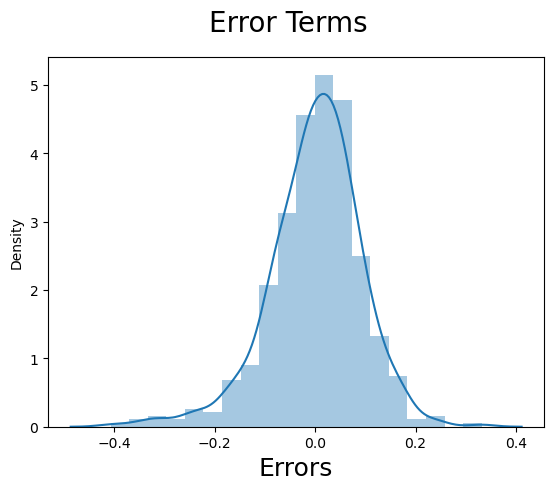

In [142]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

Text(0.5, 1.0, 'Residuals vs fitted values plot for homoscedasticity check')

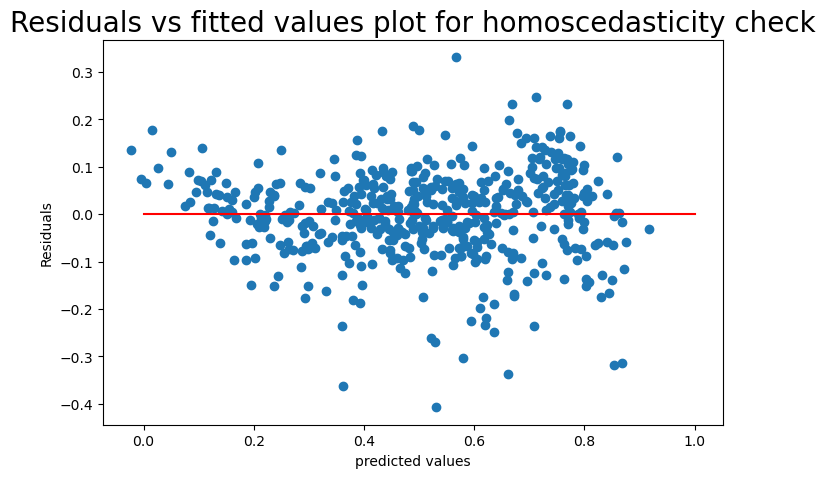

In [145]:
# Check for Homoscedasticity
residuals = y_train - y_train_pred
plt.figure(figsize = [8,5])
plt.scatter(y_train_pred, residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')

plt.plot([0,1],[0,0],color='red')
plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)

### Observation:
1. From the above scatter plot, it is evident that the errors are randomly distributed without following any pattern.
2. This ensures that, the final model built is more significant and there are no better variables help to explain the model better.

## Step 7 : Making Predictions based on final model built

### Scaling the test set to obtain good prediction:

In [146]:
#scaling all numeric variables
to_scale_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#scaling
bike_test[to_scale_vars] = scaler.transform(bike_test[to_scale_vars])

### Dividing into X_test and y_test

In [147]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [148]:
#lets alter the X_test dataset as same as X_train_rfe
cols_new = X_train_rfe.columns

X_test = X_test[cols_new]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test)

X_test_lm.head()

,const,is_holiday,temp,windspeed,summer,winter,yr_2019,sept,light_rain,mist
184,1.0,1,0.831783,0.084219,0,0,0,0,0,1
535,1.0,0,0.901354,0.153728,1,0,1,0,0,0
299,1.0,0,0.511964,0.334206,0,1,0,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,1,0,0,0,0,0


In [149]:
#Making predictions using final model
y_test_pred = lr10.predict(X_test_lm)

## Step 8 : Model Evaluation

Text(0, 0.5, 'y_test_pred')

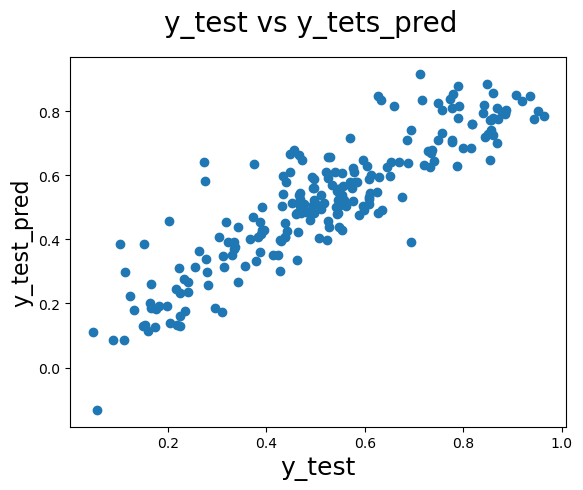

In [150]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_tets_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)   

### It is observed that, there is a linear correlation between y_test and y_test_pred

## Step 10: R-squared  Evaluation:

In [151]:
#importing the necessary library to get r-square values
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('R-sqaured Test :',round((r2_test*100),2))
print('R-squared Train :',round((r2_train*100),2))

R-sqaured Test : 79.38
R-squared Train : 83.08


### The R-squared values between test and train sets are close to each other, therefore the final model is pretty good.

### Therefore, Model 10 is the final model. 

## Overall Model Summary and validity:

Answering the problem statement:

- Question 1. Which variables are significant in predicting the demand for shared bikes? 

#### Answer : temp, windspeed, yr_2019, summer, mist, winter, sept, light_rain, is_holiday

We know that, 
1. Null Hypothesis : H0 = B1,B2,B3..Bn == 0 
2. Alternate Hypothesis : H1 = B1,B2,B3..Bn != 0

#### From the summary of the final model, it is evident that  all our coefficients are not equal to zero. which means we can reject the null hypothesis

### F Statistics : F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 272.9
- Prob (F-statistic): 1.37e-186
- The F-Statistics value of 272.9 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### The equation for best fitted line based on final Model: 

- Cnt = 0.1264 - (is_holiday*0.0992) + (temp*0.5480) - (windspeed*0.1533) + (summer*0.0868) + (winter*0.1306) + (yr_2019*0.2328) + (sept*0.1011) - (light_rain*0.2838) - (mist*0.0797)

- Question 2. How well those variables describe the bike demands?

### Answer
#### 1. const: The Constant value of ‘0.1996’ indicates that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike demand still increases by 0.1996 units.

#### 2. is_ℎ𝑜𝑙𝑖𝑑𝑎𝑦: A coefficient value of ‘-0.0992’ indicate a unit decrease in is_holiday variable, decreases bike demand by 0.0928 units.

#### 3. 𝑡𝑒𝑚𝑝: A coefficient value of ‘0.5480’ indicate a unit increase in temp variable, increases the bike demand by 0.5480 units.

#### 4. 𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑: A coefficient value of ‘-0.1533’ indicate a unit decrease in windspeed variable, decreases bike demand by 0.1533 units.

#### 5. 𝑠𝑢𝑚𝑚𝑒𝑟: A coefficient value of ‘0.0868’ indicate a unit increase in summer variable, increases bike demand by 0.0868 units.

#### 6. 𝑤𝑖𝑛𝑡𝑒𝑟: A coefficient value of ‘0.1306’ indicate a unit increase in winter variable, increases bike demand by 0.1306 units.

#### 7. yr_2019: A coefficient value of ‘0.2328’ indicate a unit increase in yr_2019 variable, increases the bike demand by 0.2328 units.

#### 8. s𝑒𝑝𝑡: A coefficient value of ‘0.1011’ indicate a unit increase in sept variable, increases the bike demand by 0.10118 units.

#### 9. light_rain: A coefficient value of ‘-0.2838’ indicate a unit decrease in light_rain variable, decreases the bike demand by 0.2838 units.

#### 10. mist: A coefficient value of ‘-0.0797’ indicate a unit decrease in mist variable, decreases the bike demand by 0.0797 units.
